<a href="https://colab.research.google.com/github/sushelan/computationalphysicsprojects/blob/main/SushanthE_QuantumComputing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Computing

* **Author:** Sushanth Elangovan
* **Date:** Dec 3
* **Time Spent on this Assignment:**

In [ ]:
!pip install qiskit[visualization];
!pip install qutip
!pip install qiskit_aer;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 107.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=d555398b933786a945ec14f3b572023d208e940b60e5a1d082f10e1b7f0e51e9
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 115.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pylab as plt
import qiskit
import qutip
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


In [ ]:
def RunMe(circuit,a=None):
  """
  Runs a quantum circuit and returns the state vector and measurement results.

  Args:
    circuit (QuantumCircuit): The quantum circuit to run.
    a (list, optional): A list of initial state amplitudes. If provided, the circuit will be initialized with these amplitudes. Otherwise it will start from |0>.

  Returns:
    tuple: A tuple containing the state vector and measurement results.
  """
  numQubits=circuit.num_qubits
  if a!=None:
    numQubits=max(numQubits,a.num_qubits)
    initCircuit=QuantumCircuit(a.num_qubits,a.num_qubits)
    initCircuit.initialize(a)
    circuit=AddCircuits([initCircuit,circuit])
  circuit.save_statevector(label='myStateVector')
  compiled_circuit = transpile(circuit, simulator)
  resultA = simulator.run(compiled_circuit).result()
  forward=list(range(0,numQubits))
  reverse=forward[::-1]
  circuit.measure(forward,reverse)
  compiled_circuit = transpile(circuit, simulator)
  resultB = simulator.run(compiled_circuit).result()
  return resultA.data()['myStateVector'],resultB.data()['counts']


def MakeState(v):
  """
  Creates a qiskit state vector from a numpy array of amplitudes.
  """
  numWires=int(round(np.log2(len(np.array(v)))))
  qc1=QuantumCircuit(numWires,numWires)
  qc1.initialize(v)
  a,_=RunMe(qc1)
  return a

def PrintDirac(out_state_a):
  """
  Prints the state vector in Dirac notation.
  """
  out_state=np.asarray(out_state_a)
  l=len(out_state)
  num_qubits=int(round(np.log(len(out_state))/np.log(2)))
  for i in range(0,l):
    if not np.isclose(out_state[i],0):
      print(str(out_state[i])+'|'+bin(i)[2:].zfill(num_qubits)[::-1]+'>',end=' + ')
  print()

def PlotBloch(v,bb):
  """
  Plots the Bloch sphere representation of a quantum state.
  """
  vv=np.asarray(v)
  a=vv[0]*np.conj(vv[0])
  b=vv[1]*np.conj(vv[0])
  x = np.real(2.0 * b.real)
  y = np.real(2.0 * b.imag)
  z = np.real(2.0 * a - 1.0)
  bb.add_vectors([x,y,z])
  return

def PlotState(v,plotAll=True,myTitle=""):
  """
  Plots the real and imaginary parts of a quantum state vector.
  The x-axis is the index of the state in the list of 2^N, where N is the number of qubits.
  The y-axis is the real and imaginary part of the state vector.
  Args:
    v (list): The quantum state vector to plot.
    plotAll (bool): If True, plot all states. If False, plot only the first half.
    myTitle (str): The title of the plot.
  """
  if plotAll:
    N=len(np.asarray(v))
  else:
    N=len(np.asarray(v))//2
  vv=np.zeros(N,dtype=complex)
  vv[:]=np.asarray(v)[0:N]
  vv=vv*np.exp(-1.j*np.angle(vv[0]))
  plt.axhline(0)
  for idx,i in enumerate(vv):
    plt.plot([int(idx),int(idx)],[0,np.real(i)],color='red')
    plt.plot([int(idx)],[np.real(i)],'o',color='red')
  for idx,i in enumerate(vv):
    plt.plot([idx+0.1,idx+0.1],[0,np.imag(i)],color='blue')
    plt.plot([idx+0.1],[np.imag(i)],'o',color='blue')
  avg=np.average(vv)
  plt.axhline(np.real(avg),linestyle='--')
  plt.ylim(-1,1)
  plt.title(myTitle)
  plt.show()



def AddCircuits(theCircuits):
  """
  Concatenates a list of circuits into a new circuit.
  Args:
    theCircuits (list): A list of QuantumCircuit objects to concatenate.
  Returns:
    QuantumCircuit: A new QuantumCircuit object that is the concatenation of the input circuits.
  """
  numQubits=np.array([c.num_qubits for c in theCircuits])
  numQubits=np.max(numQubits)
  circuit=QuantumCircuit(numQubits,numQubits)
  for i in range(0,len(theCircuits)):
    circuit=circuit.compose(theCircuits[i],qubits=list(range(0,theCircuits[i].num_qubits)))
  return circuit


def Mark(r,N):
  """
  Creates a quantum circuit that marks a specific state |r> in the computational basis. (this is for Grover's algorithm)
  Args:
    r (int): The index of the state to mark in the computational basis.
    N (int): The number of qubits in the circuit.
  """
  circuit=QuantumCircuit(N,N)
  circuit.barrier()


  myString=np.binary_repr(r,width=N)[::-1]
  for i in range(0,len(myString)):
    if myString[i]=='0':
      circuit.x(i)
  circuit.barrier()

  circuit.h(N-1)
  circuit.mcx(list(range(0,N-1)), N-1,mode='noancilla')
  circuit.h(N-1)
  circuit.barrier()

  for i in range(0,len(myString)):
    if myString[i]=='0':
      circuit.x(i)
  circuit.barrier()
  return circuit

def InitializeCircuitRandom(N):
  """
  Creates a quantum circuit that initializes a random state vector of size 2^N.
  Args:
    N (int): The number of qubits in the circuit.
  Returns:
    QuantumCircuit: A QuantumCircuit object that initializes a random state vector.
  """
  r=np.random.random(2**N)
  r=r/np.linalg.norm(r)
  circuit=QuantumCircuit(N,N)
  circuit.initialize(list(r))
  return circuit


def InitializeCircuit(my_string,N):
  """
  Creates a quantum circuit that initializes a specific state vector.
  Args:
    my_string (str): A string of 0s and 1s representing the state vector. That is, all ups would be '00000' and all downs would be '11111'.
    N (int): The number of qubits in the circuit.
  """
  circuit = QuantumCircuit(N,N)
  circuit.initialize(my_string[::-1])
  return circuit

simulator = AerSimulator()




## Exercise 1: A Single Qubit (33 points)

### a. A one qubit state

A quantum state consists of a certain fraction of $|0\rangle$ and a certain fraction of $|1\rangle$ - i.e.  $\sqrt{0.3} |0\rangle - \sqrt{0.7} |1\rangle$.

We can plot this state in a variety of ways.
```
state=np.array([np.sqrt(0.3),-np.sqrt(0.7)])
state=MakeState(state)
PrintDirac(state)
PlotState(state)
b=qutip.Bloch()
PlotBloch(state,b)
b.render()
b.show()
```

Go ahead and try it out

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(0.5477225575051661+0j)|0> + (-0.8366600265340756+0j)|1> + 


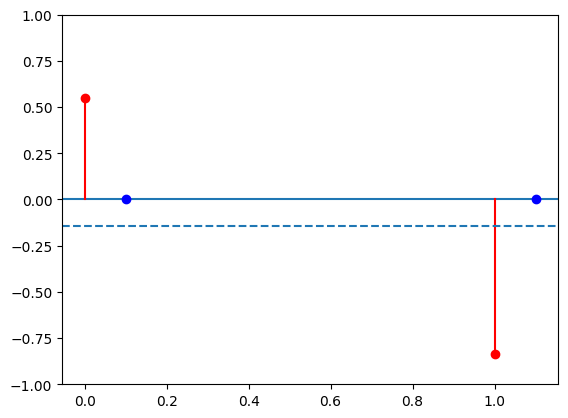

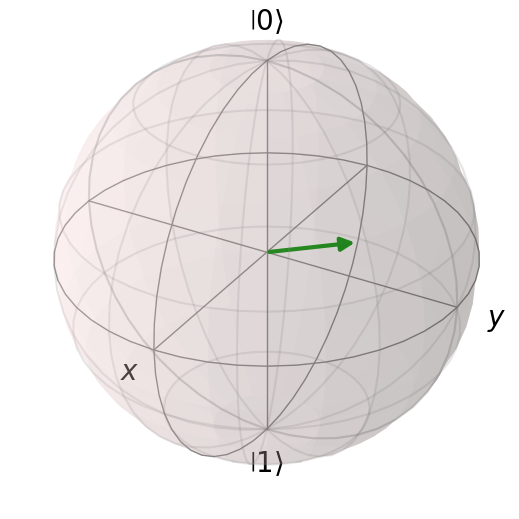

In [ ]:
### ANSWER HERE
state=np.array([np.sqrt(0.3),-np.sqrt(0.7)])
state=MakeState(state)
PrintDirac(state)
PlotState(state)
b=qutip.Bloch()
PlotBloch(state,b)
b.render()
b.show()

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Let's go ahead and plot these three states
* $|0\rangle \equiv [1,0]$
* $|1\rangle \equiv [0,1]$
* $1/\sqrt{2} |0\rangle + 1/\sqrt{2} |1\rangle \equiv [1/\sqrt{2},1/\sqrt{2}]$

Pay special attention to where those three states are on the Bloch Sphere

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(1+0j)|0> + 
(1+0j)|1> + 
(0.7071067811865475+0j)|0> + (0.7071067811865475+0j)|1> + 


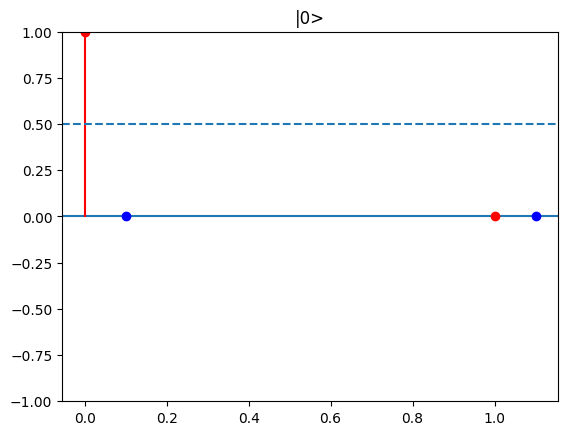

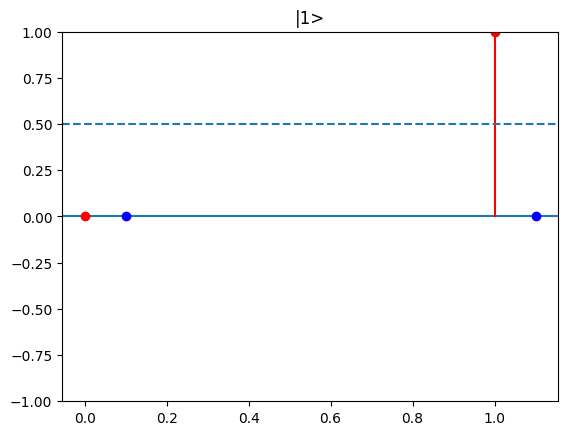

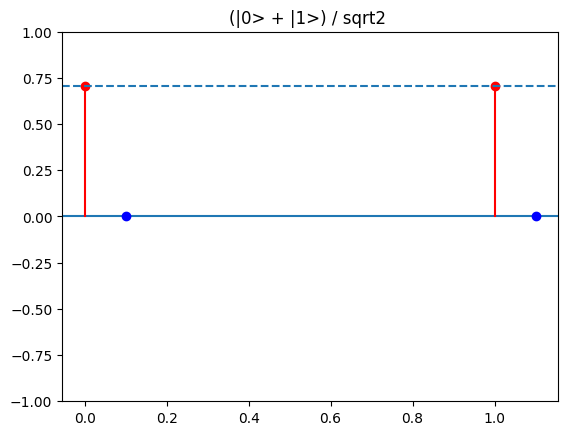

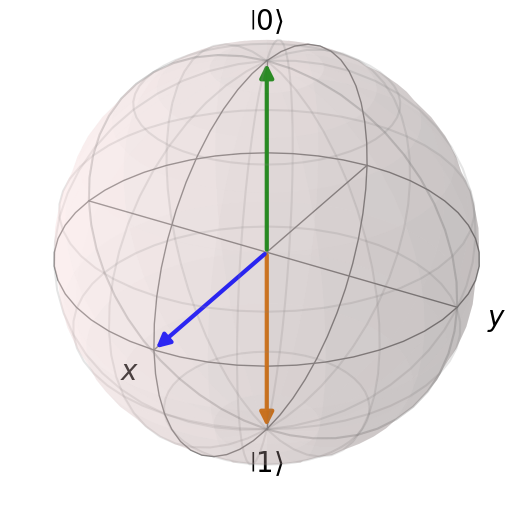

In [ ]:
### ANSWER HERE
state1=np.array([1,0])
state2=np.array([0,1])
state3=np.array([1.0/np.sqrt(2), 1.0/np.sqrt(2)])

state1=MakeState(state1)
state2=MakeState(state2)
state3=MakeState(state3)

PrintDirac(state1)
PrintDirac(state2)
PrintDirac(state3)

PlotState(state1,myTitle="|0>")
PlotState(state2,myTitle="|1>")
PlotState(state3,myTitle="(|0> + |1>) / sqrt2 ")

b=qutip.Bloch()
PlotBloch(state1,b)
PlotBloch(state2,b)
PlotBloch(state3,b)
b.render()
b.show()

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. One qubit gates

Quantum circuits are made out of quantum gates. Let us start by considering 1-qubit gates.  The 1-qubit gate rotates states around the Bloch sphere.  Three special gates are `rx`, `ry`, and `rz` which respectively rotate around the X, Y, and Z axis. These gates take an angle and a wire - i.e. `rx(1/3*np.pi,0)` will rotate $1/3 \pi$ around the X axis.

To set up your circuit you can do
```
circuit=QuantumCircuit(1,1)
#Build your circuit here
state,measure = RunMe(circuit) #<--- This runs the circuit
# now you can plot the circuit
```

Go ahead and figure out how to use `rx` gate to move from a $|0\rangle$ to a $|1\rangle$ state.



 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

-1j|1> + 


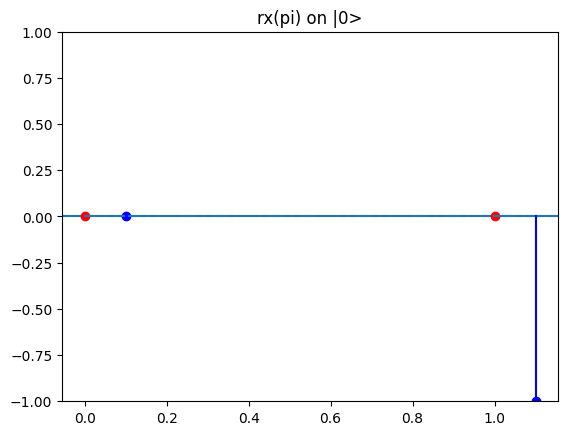

In [ ]:
### ANSWER HERE
circuit=QuantumCircuit(1,1)
# Build your circuit here
circuit.rx(np.pi,0)
state,measure = RunMe(circuit) #<--- This runs the circuit
# now you can plot the circuit
PrintDirac(state)
PlotState(state,myTitle="rx(pi) on |0>")

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Now we want to go ahead and use `ry` to go from $|0\rangle \rightarrow 1/\sqrt{2}|0\rangle + 1/\sqrt{2}|1\rangle$.  Write such a circuit.  Then check to see what your circuit does to the state $|1\rangle$ (you can get this using your other circuit from above).

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(0.7071067811865476+0j)|0> + (0.7071067811865475+0j)|1> + 


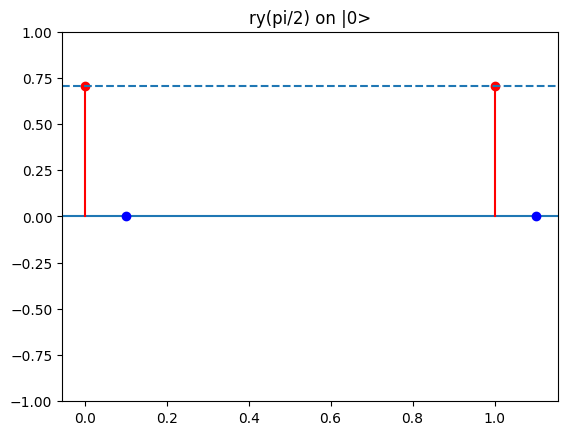

In [ ]:
### ANSWER HERE
# from 0 to (|0>+|1>)/2, the angle is pi/2
circuit = QuantumCircuit(1,1)
circuit.ry(np.pi/2,0)
state,measure = RunMe(circuit)
PrintDirac(state)
PlotState(state,myTitle="ry(pi/2) on |0>")

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

So far we've seen we can get half $|0\rangle$ and half $|1\rangle$.  We can also adjust states to get more of $|1\rangle$ then $|0\rangle$ (or visa versa).  Generically we can get a state
$\cos(\theta) |0\rangle + \sin(\theta) e^{i\phi} |1\rangle$.

If we had such a state, after measurement we get "0" with probability $\cos^2\theta$ and "1" with probability $\sin^2\theta$.  
Notice that $\cos^2\theta + \sin^2\theta =1$ so we either get "0" or "1".

To produce this state with $\phi=0$, we can use the gate `qc.ry(2*theta,wire)` which takes $|0\rangle \rightarrow \cos \theta |0\rangle + \sin \theta |1\rangle$

Produce the state $\cos(0.5)|0\rangle + \sin(0.5)|1\rangle$ and check to make sure it gives you the right amplitudes.


 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(0.8775825618903728+0j)|0> + (0.479425538604203+0j)|1> + 


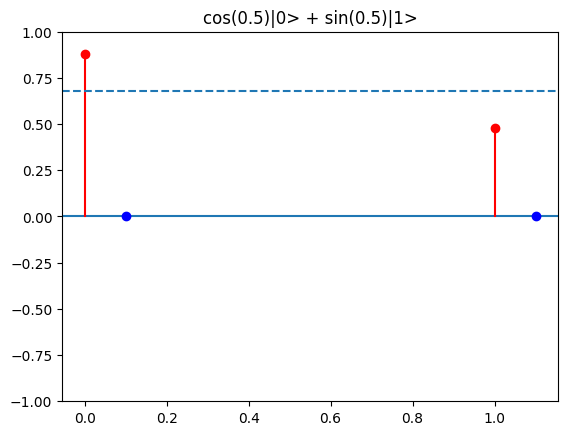

In [ ]:
### ANSWER HERE
theta=0.5
circuit = QuantumCircuit(1,1)
circuit.ry(2*theta,0)
state,measure = RunMe(circuit)
PrintDirac(state)
PlotState(state,myTitle="cos(0.5)|0> + sin(0.5)|1>")

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now, make a circuit that rotates  `rx` and `rz` both by $0.3 \pi$.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(0.7938926261462366-0.4045084971874739j)|0> + (0.20610737385376335-0.4045084971874737j)|1> + 


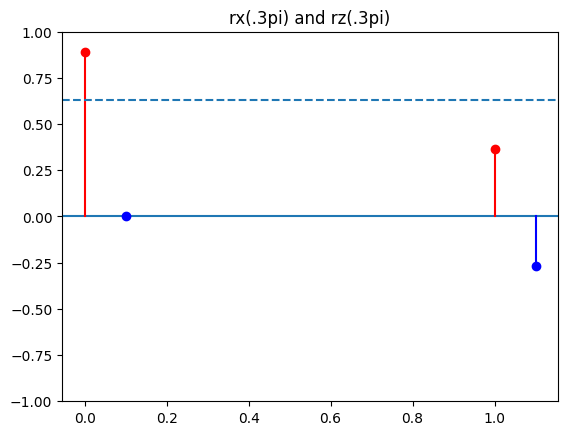

In [ ]:
### ANSWER HERE
circuit=QuantumCircuit(1, 1)
theta=.3 * np.pi
circuit.rx(theta,0)
circuit.rz(theta,0)
state,measure = RunMe(circuit)
PrintDirac(state)
PlotState(state,myTitle="rx(.3pi) and rz(.3pi)")

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Notice that by smartly choosing the angles around `rx` and `rz` and then `rx` again you can produce an arbitrary rotation on the sphere and therefore take $|0\rangle$ and $|1\rangle$ to any two orthogonal states.

### c.  Seeing the rotation

We would like to plot the rotation around the bloch sphere.  We can do this as follows:

```
b=qutip.Bloch()
for angle in np.arange(0,2*np.pi*0.8,0.1):
  quantumWires=1
  qc = QuantumCircuit(quantumWires,quantumWires)
  # rotate around the x-axis by angle theta
  vec,output=RunMe(qc)
  PlotBloch(vec,b)
b.render()
b.show()
```



 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

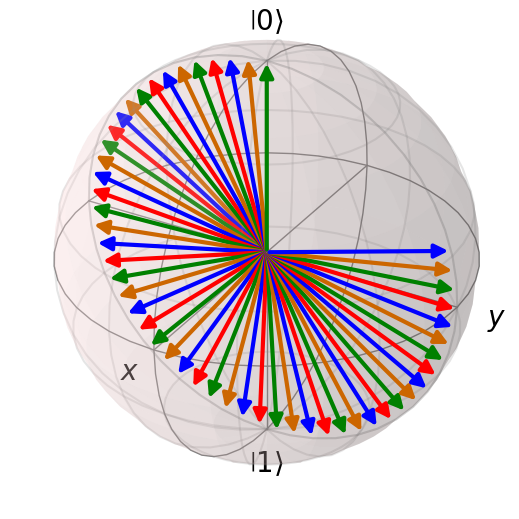

In [ ]:
### ANSWER HERE
b=qutip.Bloch()
for angle in np.arange(0,2*np.pi*0.8,0.1):
  quantumWires=1
  qc = QuantumCircuit(quantumWires,quantumWires)
  # rotate around the x-axis by angle theta
  qc.rx(angle,0)
  vec,output=RunMe(qc)
  PlotBloch(vec,b)
b.render()
b.show()

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Measuring the state

So far we've been cheating by looking at the quantum state. In the real world, you can't do that.  Instead you have to measure at the end of your circuit.  The RunMe circuit returns two parameters.  The second one is measurement outcomes - i.e.
```
vector,measure=RunMe(circuit)
```
can then plot the measurement outcomes by doing
```
plot_histgoram(measure)
```

Go ahead and measure the outcomes of a state rotated around the X axis by $0.3\pi$. See that it gives you the expected raction of 0 and 1.  Remember that the probability should be equal to the amplitude squared.




 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(0.8910065241883679+0j)|0> + -0.45399049973954675j|1> + 


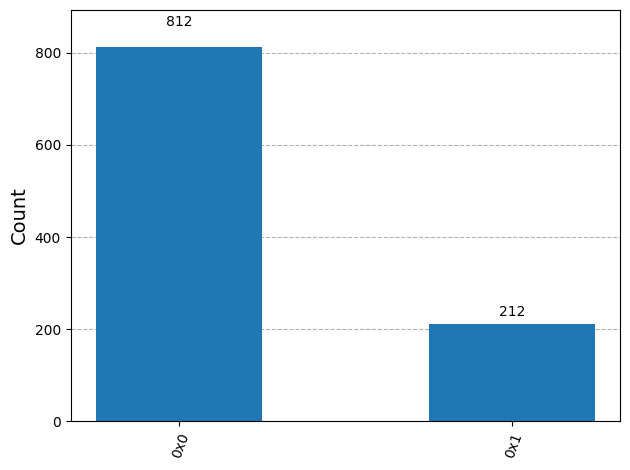

In [ ]:
### ANSWER HERE
angle=.3*np.pi
circuit=QuantumCircuit(1,1)
circuit.rx(angle,0)
state,measure=RunMe(circuit)
PrintDirac(state)
plot_histogram(measure)
#812/(812+212) is approximately cos(.3pi)^2
#212/(812+212) is approximately sin(.3pi)^2

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 2: Two qubits (34 points)

In this exercise we will see how to build quantum states of two qubits.  


### a. Control-not gates

*The controlled-not gate:* The key gate for two qubits is the control-not gate (`circuit.cx(0,1)`).  The key gate "nots" the second wire (wire 1) if the first wire is "1" (wire 0).  Let's check it out.  Apply the "control-not" to a state $|00\rangle$ and to a state $|10\rangle$ and print out the state (not the measurement outcome)



 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

CNOT |00>
(1+0j)|00> + 


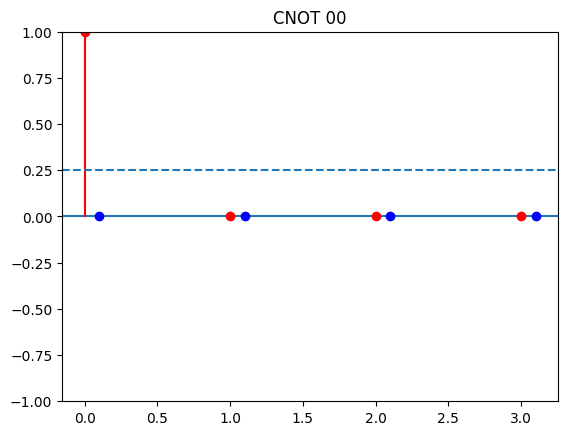

CNOT |10>
(1+0j)|11> + 


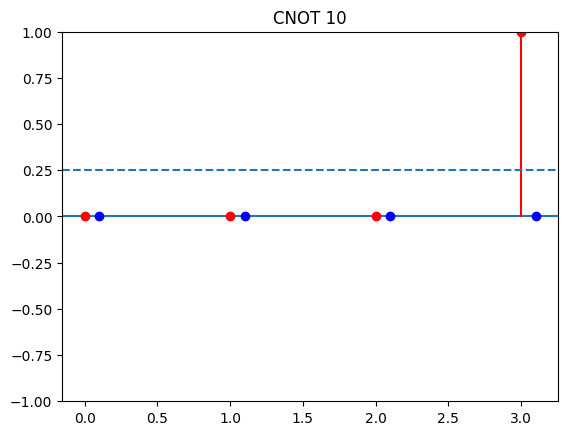

In [ ]:
### ANSWER HERE
circuit=QuantumCircuit(2,2)
circuit.cx(0,1)
state00,measure00 = RunMe(circuit)
print("CNOT |00>")
PrintDirac(state00)
PlotState(state00,myTitle='CNOT 00')

circuit=QuantumCircuit(2,2)
#flip the first wire by doing .x(0). X gate is a not gate
# this gives |10>
circuit.x(0)
circuit.cx(0,1)
state10,measure10 = RunMe(circuit)
print("CNOT |10>")
PrintDirac(state10)
PlotState(state10,myTitle='CNOT 10')

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b.  Build an EPR Pair

The most interesting two qubit state is an EPR pair, $\frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.    You can build it with a Hadamard and a CNOT.  Go ahead and try different things and figure out how to build yourself an EPR pair.  You can start out with
```
quantumWires=2
classicalWires=2
qc=QuantumCircuit(quantumWires,classicalWires)
```
to start out a quantum circuit with two wires.  You can't plot this on the bloch sphere but you can still plot it with `PlotState`.  =

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(0.7071067811865476+0j)|00> + (0.7071067811865475+0j)|11> + 


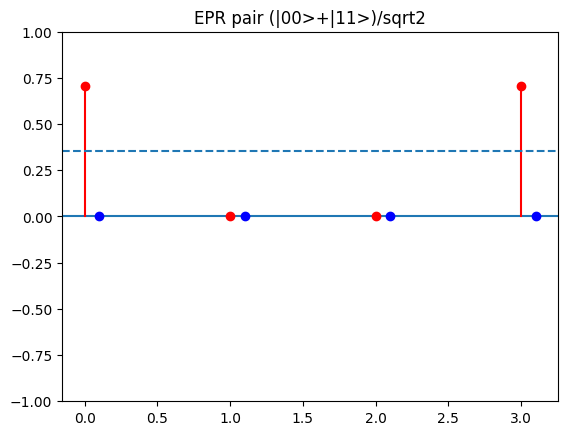

In [ ]:
### ANSWER HERE
quantumWires=2
classicalWires=2
qc=QuantumCircuit(quantumWires,classicalWires)

#hadamard
qc.h(0)
#cnot
qc.cx(0,1)

state,measure=RunMe(qc)
PrintDirac(state)
PlotState(state,myTitle="EPR pair (|00>+|11>)/sqrt2")


 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Measuring EPR Pairs

Now that you've made an EPR pair, let's go ahead and measure your EPR circuit above plotting the histogram of your measurements.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

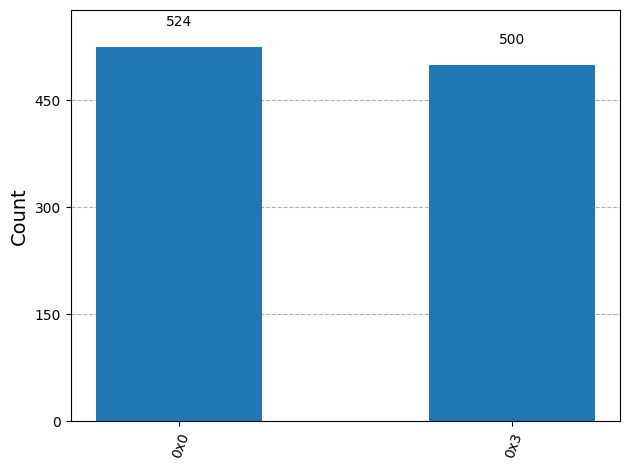

In [ ]:
### ANSWER HERE
plot_histogram(measure)

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

There is something very powerful here.  If you get a "0" on the top wire, then you always get a "0" on the bottom wire.  If you get a "1" on the top wire, then you get a "1" on bottom wire.  This is even the case if these wires are taken miles apart before you measure.  

## Exercise 3:  Grover's Algorithm



In this exercise, we are going to implement Grover's algorithm.  Grover's algorithm solves the search problem


Grover's algorithm takes a unitary which marks an element $i$ and uses that as a subroutine with more circuit elements so that, after measurement, you sample the marked element $i$.

To do this we are going to need to put together a lot of different circuit elements.  Let's start with the unitary which does the marking which we will give you.  In this case it's going to mark element 3 by taking it and changing its sign.  Go ahead and run this to see explicitly what it does.

```
## Check Mark
circuit=InitializeCircuitRandom(5)
a,b=RunMe(circuit)
PlotState(a,True,myTitle="Initial Random State")
circuit=Mark(3,5)
a,b=RunMe(circuit,a)
PlotState(a,True,myTitle="Hopefully marked state")
```

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

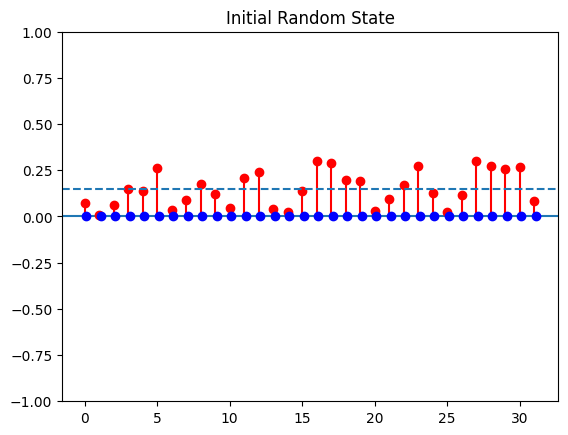

/tmp/ipython-input-3177527353.py:130: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circuit.mcx(list(range(0,N-1)), N-1,mode='noancilla')


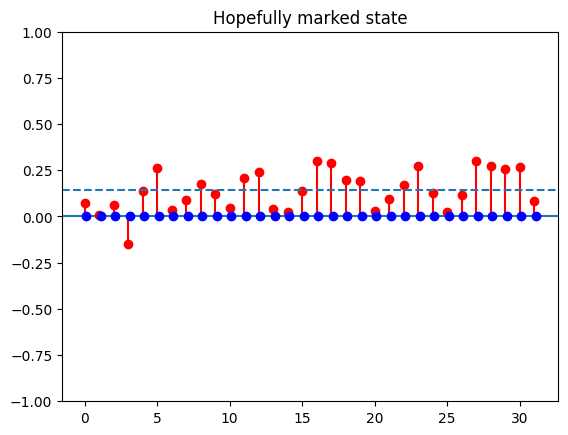

In [ ]:
### ANSWER HERE
## Check Mark
circuit=InitializeCircuitRandom(5)
a,b=RunMe(circuit)
PlotState(a,True,myTitle="Initial Random State")
circuit=Mark(3,5)
a,b=RunMe(circuit,a)
PlotState(a,True,myTitle="Hopefully marked state")

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### a. Control-Control-Control Z

Define a function `controlZ(N)` which generates the control-control-control-control Z on $n$ qubits.  The first $n-1$ qubits have to be all 1 for the last Z qubit to happen.  

To do this, implement the following circuit for general values of N. This is an example for `controlZ(5)`.

<img src="https://clark.physics.illinois.edu/qcPics/controlZ.png" width="300">


You can get a control-control-control-control-x from qiskit by doing the following:
```
circuit.mcx(list(range(0,N-1)), N-1,mode='noancilla')
```
where $N-1$ is the numer of target wires.


 Test out your circuit by using the following code:
```
initCircuit=InitializeCircuit('11110',5)
#initCircuit=InitializeCircuit('11010',5)
initCircuit.h(4)
circuit=AddCircuits([initCircuit,ControlZ(5)])
print(circuit)
a,b=RunMe(circuit)
PrintDirac(a)
```


You should get something close to
```
(0.7071067811865475+8.659560562354932e-17j)|11110> + (-0.7071067811865476-8.659560562354934e-17j)|11111>
```

and then if you comment out the second initialization with `11010` you will get
```
(0.7071067811865476+0j)|11010> + (0.7071067811865475+0j)|11011>
```

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE
def ControlZ(N):
  circuit=QuantumCircuit(N,N)
  circuit.h(N-1)
  circuit.mcx(list(range(0,N-1)), N-1,mode='noancilla')
  circuit.h(N-1)
  return circuit

initCircuit=InitializeCircuit('11110',5)
# initCircuit=InitializeCircuit('11010',5)
initCircuit.h(4)
circuit=AddCircuits([initCircuit,ControlZ(5)])
print(circuit)
a,b=RunMe(circuit)
PrintDirac(a)


/tmp/ipython-input-1786082300.py:5: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circuit.mcx(list(range(0,N-1)), N-1,mode='noancilla')


     ┌────────────────────────┐                    
q_0: ┤0                       ├────────────■───────
     │                        │            │       
q_1: ┤1                       ├────────────■───────
     │                        │            │       
q_2: ┤2 Initialize(0,1,1,1,1) ├────────────■───────
     │                        │            │       
q_3: ┤3                       ├────────────■───────
     │                        │┌───┐┌───┐┌─┴─┐┌───┐
q_4: ┤4                       ├┤ H ├┤ H ├┤ X ├┤ H ├
     └────────────────────────┘└───┘└───┘└───┘└───┘
c: 5/══════════════════════════════════════════════
                                                   
(0.7071067811865475-8.659560562354932e-17j)|11110> + (-0.7071067811865476+8.659560562354934e-17j)|11111> + 


 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. All Hadamards

Define a function `AllHadamard(n)` which builds $n$ wires of Hadamards

<img src="https://clark.physics.illinois.edu/qcPics/allHadamard.png" width="100">


Check it by the following test:
```
circuit=AllHadamard(5)
a,b=RunMe(circuit)
PlotState(a,True)
```

and seeing that it produces a state which is uniform.  This is what we will use for the start of Grover's algorithm.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

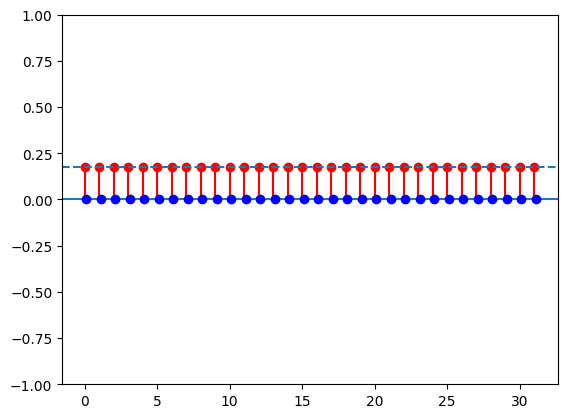

In [ ]:
### ANSWER HERE
def AllHadamard(n):
  circuit= QuantumCircuit(n,n)
  for i in range(n): circuit.h(i)
  return circuit
circuit=AllHadamard(5)
a,b=RunMe(circuit)
PlotState(a,True)

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. FlipAllButZero

Define `FlipAllButZero(n)`. which should flip all but the zero configurations on $n$ bits.  It will us $n+1$ wires (you need an ancilla, which is an extra bit that doesn't get read out later. We will plot our state using `PlotState(a,False)` to ignore this extra bit).  The example below is the output for FlipAllbutZero(4)


<img src="https://clark.physics.illinois.edu/qcPics/allZero.png" width="300">


You might want to add some circuits together.  To add these circuits you can do
```
AddCircuits([circuit1,circuit2,circuit3])
```

You can test it your result by doing
```
circuit=InitializeCircuitRandom(4)
a,b =RunMe(circuit)
PlotState(a,True,myTitle="Initial State")
circuit=FlipAllButZero(4)
a,b =RunMe(circuit,a)
PlotState(a,False,myTitle="Flipped Circuit")
```

You should find that everything but the zero flipped.  It is ok if you are finding the zero flipped and nothing else.  Quantum states aren't defined up to a global phase and so the flipping of everything is equivalent to doing nothing.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

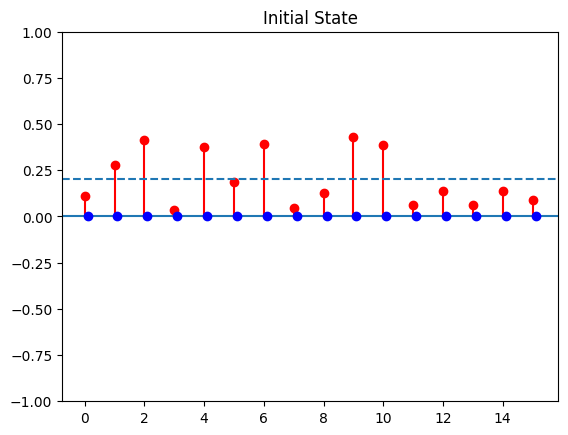

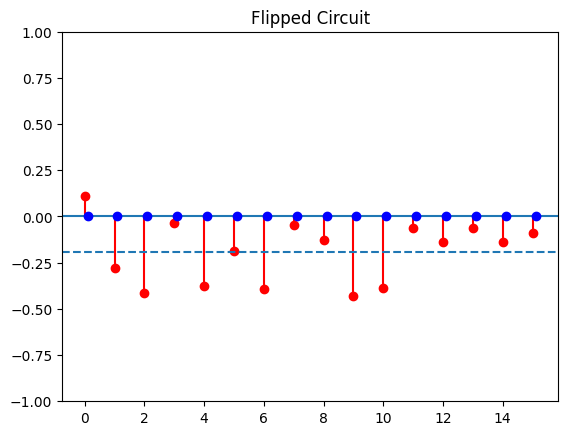

In [ ]:
### ANSWER HERE
def FlipAllButZero(n):
  numwires =n+1
  ancilla = n
  circuit1 = QuantumCircuit(numwires,numwires)
  circuit1.h(ancilla)
  circuit1.z(ancilla)

  #need to map the 0...0 to 1...1, do mcx, then back to 0...0
  circuit2 = QuantumCircuit(numwires,numwires)
  for i in range(n): circuit2.x(i)
  circuit2.mcx(list(range(n)),ancilla)
  for i in range(n): circuit2.x(i)

  circuit3 = QuantumCircuit(numwires,numwires)
  circuit3.z(ancilla)
  circuit3.h(ancilla)

  return AddCircuits([circuit1,circuit2,circuit3])


circuit=InitializeCircuitRandom(4)
a,b =RunMe(circuit)
PlotState(a,True,myTitle="Initial State")
circuit=FlipAllButZero(4)
a,b =RunMe(circuit,a)
PlotState(a,False,myTitle="Flipped Circuit")

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Invert

Define the `Invert(N)` function.  This will also be on $N+1$ wires.  Here you need to add together the AllHadamard and FlipAllButZero and AllHadamard again.


<img src="https://clark.physics.illinois.edu/qcPics/invert.png" width="300">


You can test it in the following way:
```
circuit=InitializeCircuitRandom(4)
a,b=RunMe(circuit)
PlotState(a,True)
circuit=Invert(4)
a,b=RunMe(circuit,a)
PlotState(a,False)
```

This will generate a random state and then invert it around the mean (shown in a blue dotted line).  Your mean before and after should be the same and everything else should flip around that dotted line.  (Also everything totally flipping is still allowed)

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

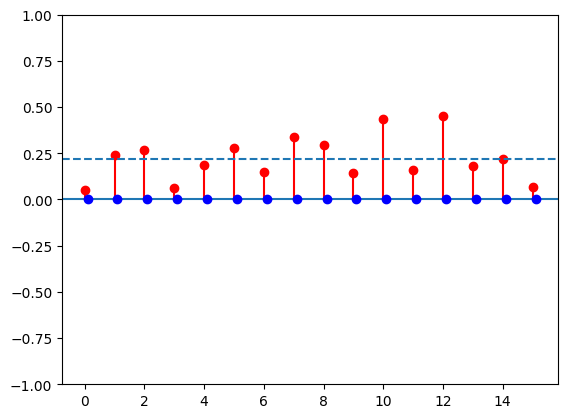

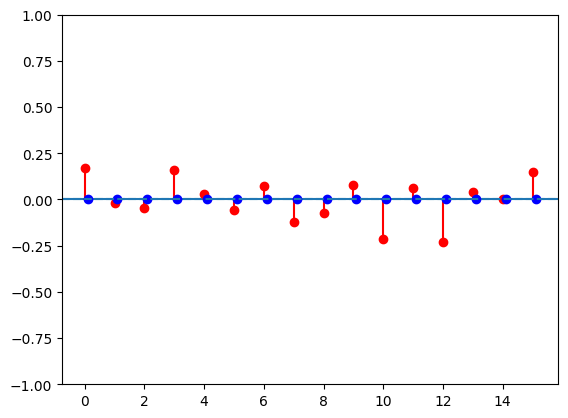

In [ ]:
### ANSWER HERE
def Invert(N):
  allhad = AllHadamard(N+1)
  flip =FlipAllButZero(N)
  invert = AddCircuits([allhad,flip,allhad])
  return invert
circuit=InitializeCircuitRandom(4)
a,b=RunMe(circuit)
PlotState(a,True)
circuit = Invert(4)
a,b=RunMe(circuit,a)
PlotState(a,False)

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e. Running Grover's Algorithm

Put everything together to run Grover's algorithm.  

<img src="https://clark.physics.illinois.edu/qcPics/Grovers.png" width="600">


 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

/tmp/ipython-input-3177527353.py:130: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circuit.mcx(list(range(0,N-1)), N-1,mode='noancilla')
/tmp/ipython-input-3177527353.py:130: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circuit.mcx(list(range(0,N-1)), N-1,mode='noancilla')
/tmp/ipython-input-3

(0.150390625+1.332281771728664e-16j)|00000> + (0.1503906250000001+1.2485656819432002e-16j)|10000> + (0.15039062500000008+1.2485656819431992e-16j)|01000> + (-0.6152343749999998-7.512921086175463e-16j)|11000> + (0.15039062499999997+1.7556459972151504e-16j)|00100> + (0.1503906249999998+2.1790102227016361e-16j)|10100> + (0.15039062499999994+2.1790102227016374e-16j)|01100> + (0.15039062499999994+2.0952941329161727e-16j)|11100> + (0.15039062500000008+2.300996524960458e-16j)|00010> + (0.15039062500000003+2.724360750446945e-16j)|10010> + (0.15039062499999994+2.724360750446944e-16j)|01010> + (0.15039062499999978+2.133564345389527e-16j)|11010> + (0.15039062499999994+2.7243607504469436e-16j)|00110> + (0.1503906249999999+3.147724975933431e-16j)|10110> + (0.1503906249999999+3.1477249759334293e-16j)|01110> + (0.1503906249999999+3.5710892014199166e-16j)|11110> + (-0.09960937499999989-1.4231735263528797e-16j)|00001> + (-0.09960937499999992-1.8130513159251815e-16j)|10001> + (-0.09960937499999989-1.8130

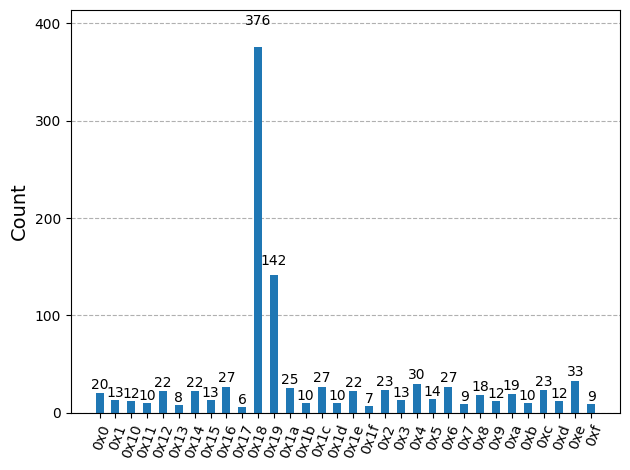

In [ ]:
### ANSWER HERE
def Grover(r,N,runs):
  circs=[]
  circs.append(AllHadamard(N))
  for run in range(runs):
    circs.append(Mark(r,N))

    circs.append(Invert(N))

  return AddCircuits(circs)

N=4
#searching for 3
r=3
runs= 3
qc = Grover(r,N,runs)
state,measure= RunMe(qc)
PrintDirac(state)
plot_histogram(measure)


#0x18 is being shown as the highest probability. i see that 0x18 = 24 = 11000.
# so this is the reverse of 00011.
#so the histogram is plotting the bits in reversed order.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

**Acknowledgement:**
* Bryan Clark (original)


Copyright: 2025

---